#  Linear regression model


### To share or not to share?

This notebook is dedicated to building a linear regression model, that might predict the (log) number of shares a Mashable article receives. 

Linear regression is a process of finding a line in a plot with quantitative data, that will make the relation in the data visible. With this line and the underlying formula, we can predict outcomes that are not presented in the dataset given. 

The used dataset comes from a study by Fernandes, Vinagre and Cortez (2015).

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("data Mashable.csv")
df = df.dropna() #drops rows if a value in the row is abscent

### Exlore the data

In order to select the variables that will be used to make the predictive model, a correlation matrix and a heatmap will be plotted. This will give information on which variables have the most significant (positive/negative) correlation to the value we want to predict; the log number of shares.

In [3]:
df_expl = df.loc[:, df.columns != "url"] #make a subset without the url in order to make the heatmap work

In [4]:
df_expl.corr()

,id,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
id,1.000000,-0.006956,0.002121,-0.001707,-0.000009,-0.000347,-0.004579,0.007765,-0.004247,0.011212,...,-0.005510,0.004893,0.007751,0.009324,0.004155,-0.002630,-0.008384,-0.010912,-0.000407,-0.003900
n_tokens_title,-0.006956,1.000000,0.022547,0.000777,0.054971,-0.051485,-0.066005,0.148125,-0.015670,-0.089559,...,-0.004514,-0.018488,0.013699,-0.002890,-0.036779,-0.059906,0.075907,0.007217,0.011404,-0.012247
n_tokens_content,0.002121,0.022547,1.000000,0.357047,0.097596,0.130334,0.033232,0.055814,-0.007911,0.035805,...,-0.013674,0.030457,0.030348,0.044572,0.093424,0.014327,0.004364,0.028852,0.009625,0.032897
num_imgs,-0.001707,0.000777,0.357047,1.000000,-0.073084,0.022387,0.001179,0.111108,-0.144599,-0.008554,...,-0.009555,0.027809,0.044483,0.053317,0.069931,0.014196,0.056100,0.046353,0.037395,0.085575
num_videos,-0.000009,0.054971,0.097596,-0.073084,1.000000,-0.006436,-0.047774,0.128427,-0.063903,-0.014793,...,0.011070,-0.009846,-0.012664,-0.016556,0.089470,-0.027871,0.058613,0.021671,0.025691,0.037147
average_token_length,-0.000347,-0.051485,0.130334,0.022387,-0.006436,1.000000,0.005017,-0.054350,0.063054,0.021908,...,0.004753,-0.019250,0.010608,-0.005759,0.523029,0.146979,-0.037501,-0.010083,-0.007094,-0.031730
data_channel_is_lifestyle,-0.004579,-0.066005,0.033232,0.001179,-0.047774,0.005017,1.000000,-0.110844,-0.105627,-0.061806,...,-0.001893,0.021400,0.034742,0.041413,0.054790,0.077873,-0.005399,0.034771,0.003820,0.036926
data_channel_is_entertainment,0.007765,0.148125,0.055814,0.111108,0.128427,-0.054350,-0.110844,1.000000,-0.202876,-0.118710,...,-0.005936,-0.015870,0.007414,-0.005749,0.027306,-0.044559,0.045334,-0.014189,-0.013069,-0.080967
data_channel_is_bus,-0.004247,-0.015670,-0.007911,-0.144599,-0.063903,0.063054,-0.105627,-0.202876,1.000000,-0.113122,...,-0.014950,-0.044736,-0.025853,-0.051383,-0.046447,0.063373,-0.040481,0.017209,-0.004352,-0.033469
data_channel_is_socmed,0.011212,-0.089559,0.035805,-0.008554,-0.014793,0.021908,-0.061806,-0.118710,-0.113122,1.000000,...,0.000117,0.010063,-0.011666,-0.001594,0.026838,0.058003,-0.013620,0.024063,0.004336,0.085516


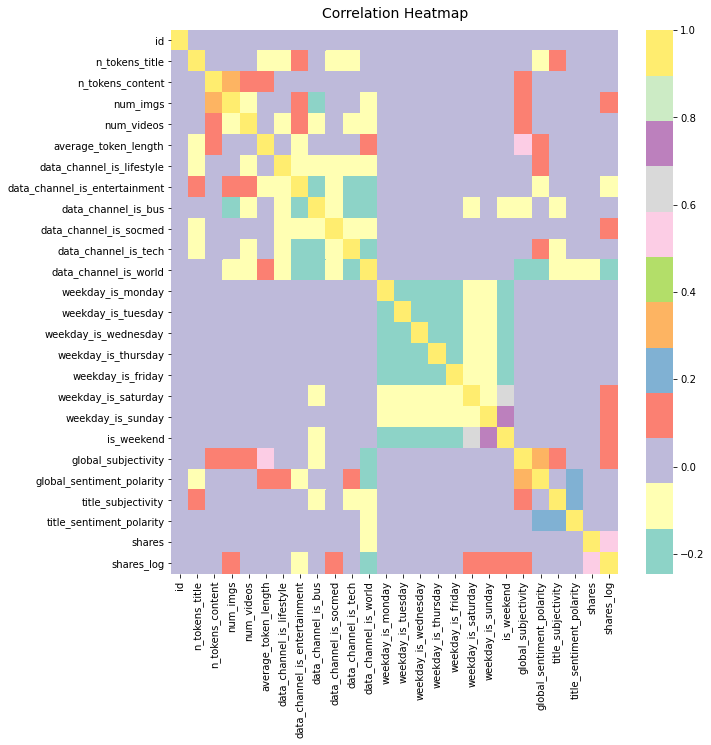

In [5]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df_expl.corr(), cmap="Set3") #I am well aware this colors are horrific, but they do give good insight in the diverse correlations
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### The chosen variables

The variables with the most correlation to the log number of shares seem to be:

- num_imgs: Number of images
- average_token_length: Average length of the words in the content
- data_channel_is_socmed: Is data channel 'Social Media'?
- data_channel_is_world: Is data channel 'World'?
- is_weekend: Was the article published on the weekend?
- global_subjectivity: Text subjectivity

The variables will be plotted below to check on outliers or errors.

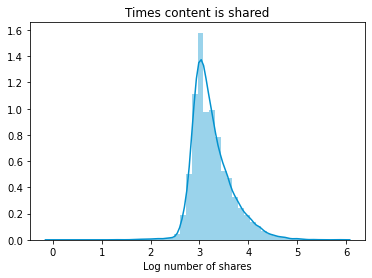

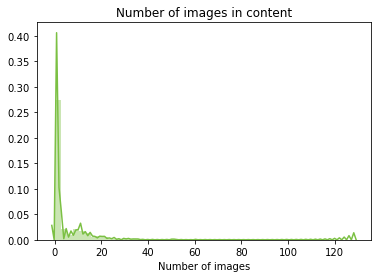

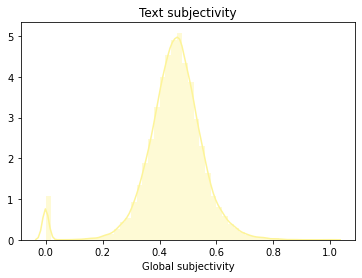

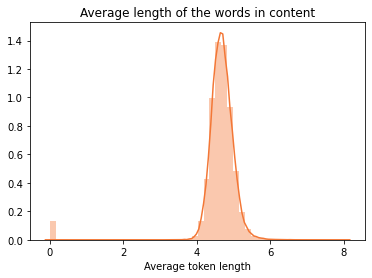

In [6]:
sns.distplot(df["shares_log"], color="#0392cf")
plt.title("Times content is shared")
plt.xlabel('Log number of shares')
plt.show()

sns.distplot(df["num_imgs"], color="#7bc043")
plt.title("Number of images in content")
plt.xlabel('Number of images')
plt.show()

sns.distplot(df["global_subjectivity"], color="#fdf498")
plt.xlabel('Global subjectivity')
plt.title("Text subjectivity")
plt.show()

sns.distplot(df["average_token_length"], color="#f37736")
plt.xlabel('Average token length')
plt.title("Average length of the words in content")
plt.show()

One observation is that there are articles that seem to have a lot of images. To further dive into this, some of those articles, for example the article that has more than a 120 images, are selected and checked via their URL. In that article not many images where found. What was found where .GIF's. Since .GIF's are a sequence of images the images counted in the dataset could also be these .GIF's and therefore creating a lot of outliers. This however, does not have an influence on the model, the correlation can still be used, therefore the ouliers will remain in the dataset that will be used to make the model.

The variables plotted below are either 0 / False or 1 / True. 

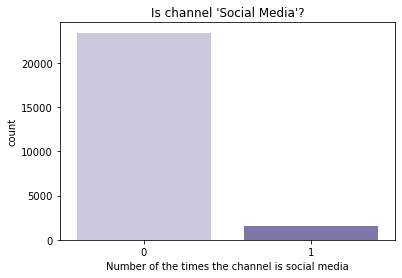

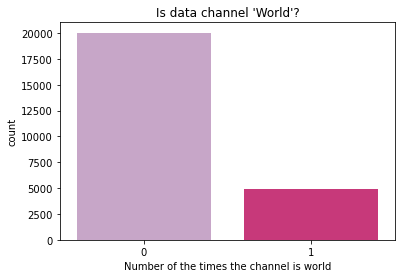

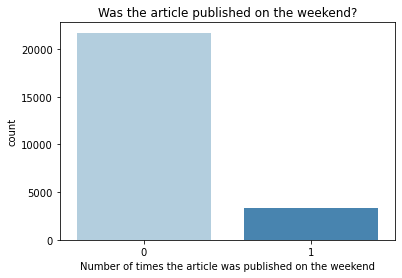

In [7]:
ax = sns.countplot(x="data_channel_is_socmed", data=df, palette="Purples")
plt.xlabel('Number of the times the channel is social media')
plt.title("Is channel 'Social Media'?")
plt.show()

ax = sns.countplot(x="data_channel_is_world", data=df, palette="PuRd")
plt.xlabel('Number of the times the channel is world')
plt.title("Is data channel 'World'?")
plt.show()

ax = sns.countplot(x="is_weekend", data=df, palette="Blues")
plt.xlabel('Number of times the article was published on the weekend')
plt.title("Was the article published on the weekend?")
plt.show()

### Clean the data

After exploring all the chose variables one error has been found. There are articles with an average token length of 0, which would make the article basically non-existent. This outlier therefore has been removed. 

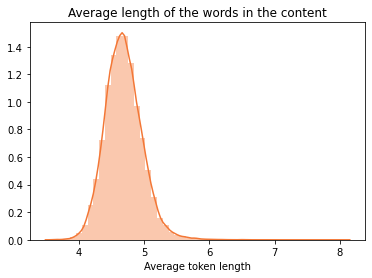

In [8]:
df = df[df["average_token_length"] > 1] #Am I doing this right? I want to remove the rows containing token length >1.

sns.distplot(df["average_token_length"], color="#f37736")
plt.title("Average length of the words in the content")
plt.xlabel('Average token length')
plt.show()

### The resulting data frame

In [9]:
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


### The relation of the selected variables with target

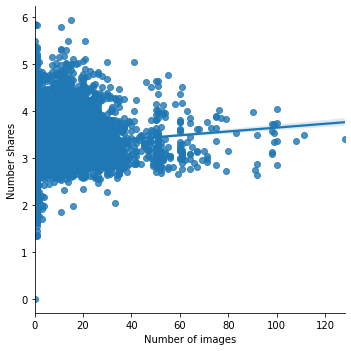

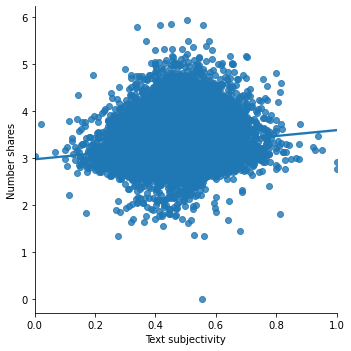

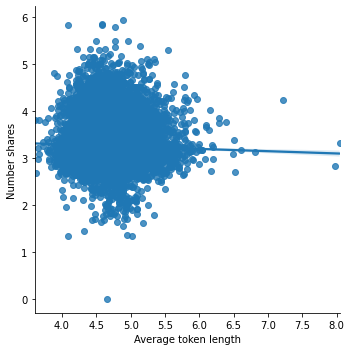

In [10]:
sns.lmplot(x="num_imgs", y="shares_log", data=df)
plt.xlabel('Number of images')
plt.ylabel('Number shares')
plt.show()

sns.lmplot(x="global_subjectivity", y="shares_log", data=df)
plt.xlabel('Text subjectivity')
plt.ylabel('Number shares')
plt.show()

sns.lmplot(x="average_token_length", y="shares_log", data=df)
plt.xlabel('Average token length')
plt.ylabel('Number shares')
plt.show()

All the variables plotted above seem to have a lot of variation around the line. The Global/Text subjectivity data seems to, compared to the other variables, follow the line the most, meaning the liniair relation is the strongest of all variables plotted above. 

### Building the model

We first need to create separate X and Y that include only the variables that we want to use.
We then will split the dataset into a training and test set.

In [11]:
df_subset = df[["shares_log", "num_imgs", "data_channel_is_socmed", "data_channel_is_world", "is_weekend", "global_subjectivity", "average_token_length"]]
y = df_subset["shares_log"]
x = df_subset.loc[:,"num_imgs":"average_token_length"]
x.head()

,num_imgs,data_channel_is_socmed,data_channel_is_world,is_weekend,global_subjectivity,average_token_length
0,12,0,0,0,0.439379,4.518879
1,6,0,1,0,0.300454,5.040900
2,0,0,0,0,0.575486,4.877863
3,2,0,0,0,0.327220,4.974820
4,18,0,0,0,0.507709,4.928409


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) #split the data, store it into different variables
x_train.head() #The train data

,num_imgs,data_channel_is_socmed,data_channel_is_world,is_weekend,global_subjectivity,average_token_length
24969,1,0,0,0,0.405417,5.076696
1094,1,0,0,0,0.552273,4.436842
12060,1,0,0,0,0.250878,4.565574
846,1,0,0,0,0.553241,4.367089
12491,1,0,0,0,0.374090,4.715134


## Create the model

In [13]:
lm = LinearRegression() #create the model
model = lm.fit(x_train, y_train) #train the model

In [14]:
coef = pd.DataFrame(x.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
0.002577,num_imgs
0.125206,data_channel_is_socmed
-0.112393,data_channel_is_world
0.120342,is_weekend
0.425079,global_subjectivity
-0.004857,average_token_length


- The Global/Text subjectivity seem to influence the amount of shares the most 

In [15]:
b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0]
b2 = lm.coef_[1]
b3 = lm.coef_[2]
b4 = lm.coef_[3]
b5 = lm.coef_[4]
b6 = lm.coef_[5] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.2f} + {b1+b2+b3+b4+b5+b6:.3f}X + e") #.0f formats to 2 decimals.

The regression line is equal to y = 3.07 + 0.556X + e


Linear regression formula:
$y= 3.07 + 0.556X + e $

In order to understand the model's performance let's generate predictions and calculate the R^2 and RMSE (the root mean squared error).

In [16]:
y_test_p = lm.predict(x_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.0544817203854332

The R^2 is 0.05, which means 5% of the variation in shares is explained by the model.

In [17]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.39860687081575086

The RMSE is 0.39. Which means that the predicted rating is about 0.39 off.

Below the predicted value will be plotted against the actual rating.

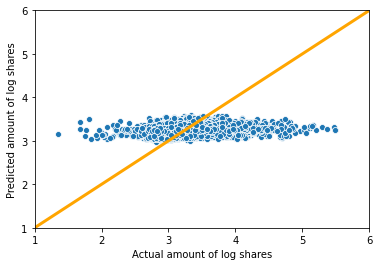

In [18]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual amount of log shares')
plt.ylabel('Predicted amount of log shares')
plt.xlim([1, 6]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([1,6])
plt.plot([1, 6], [1, 6], color='orange', lw=3) #Plot a diagonal length
plt.show()

The predictions doesn't seem to be very balanced. The model predicts the amount of log shares somewhere between 3 and 4. The actuale amount of log shares seem to vary between 1 and 6. 

### References

Fernandes, K., Vinagre, P., & Cortez, P. (2015). *A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News*. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal.